Anna Wojciechowska, Oslo, January 2023  
test details:   
**swimming pool water test**  
date: 7th January  2023  14:15 - 15:00
place: Athletica Domus  

[WH-0180 meteo station](https://www.bruksanvisningpdf.no/clas-ohlson/wh-1080/bruksanvisning?p=3) 979 [hPa]   (?)
sensor data  (absolute pressure)
[cm] - [mbar]  
0    - 986  
125  - 1102  
200  - 1180  
126  - 1104  
68   - 1049  

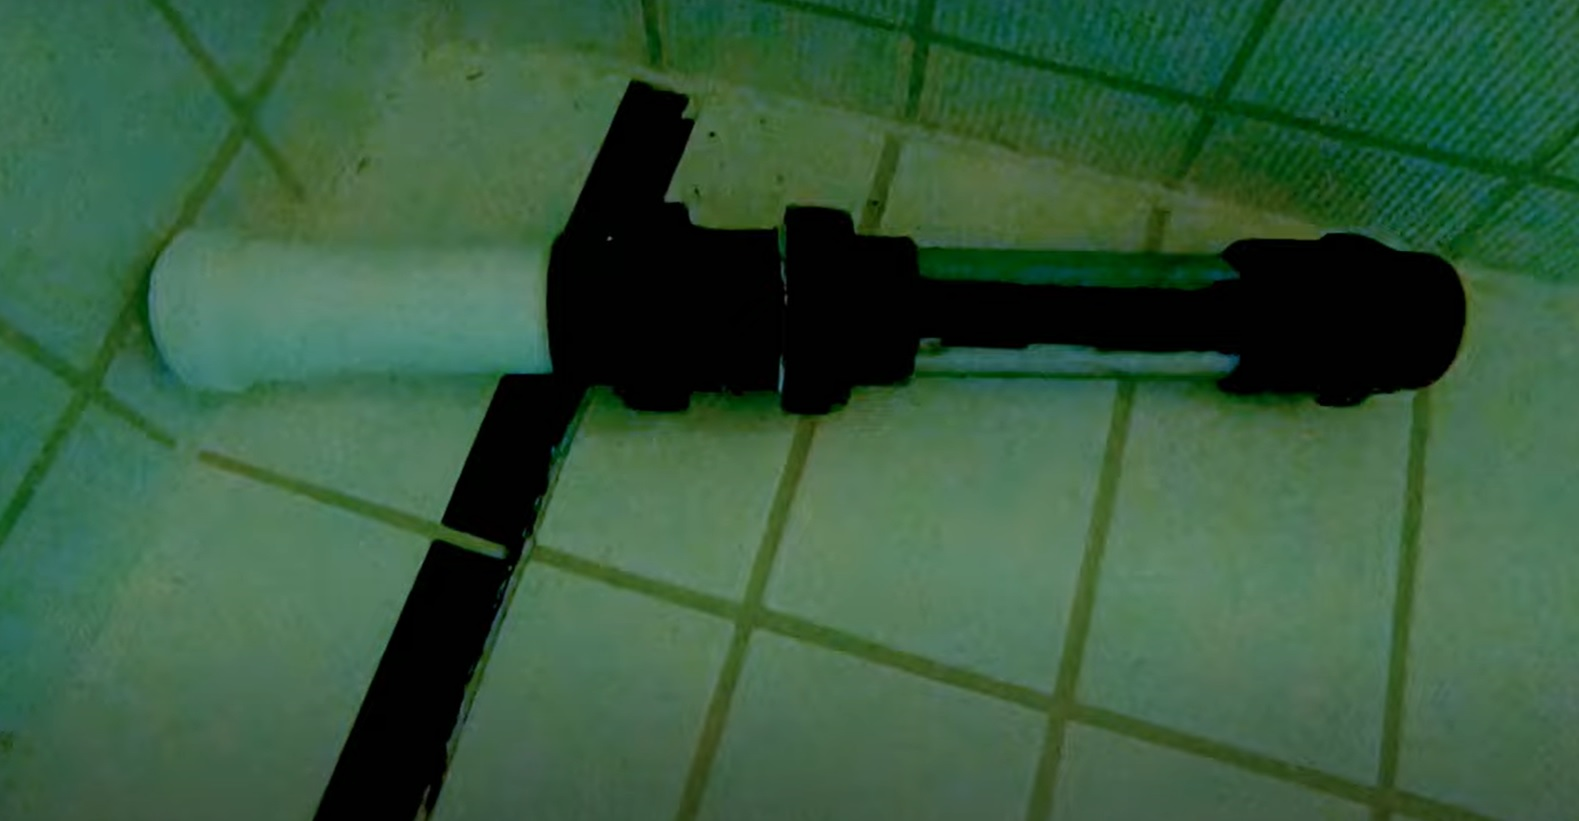



In [1]:
import pandas as pd
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame(columns=['water_level_cm', 'pressure_mb'])
df.loc[0] = [0, 986]
df.loc[1] = [125, 1102]
df.loc[2] = [200, 1180]
df.loc[3] = [126, 1104]
df.loc[4] = [68, 1049]
df.head()

,water_level_cm,pressure_mb
0,0,986
1,125,1102
2,200,1180
3,126,1104
4,68,1049


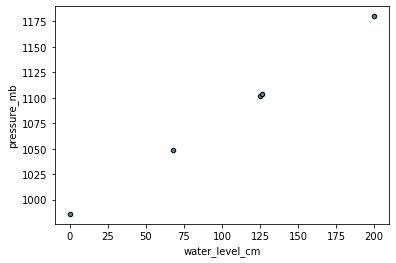

In [3]:
_ = df.plot.scatter(x='water_level_cm', y='pressure_mb', color = 'steelblue', edgecolor = 'black')

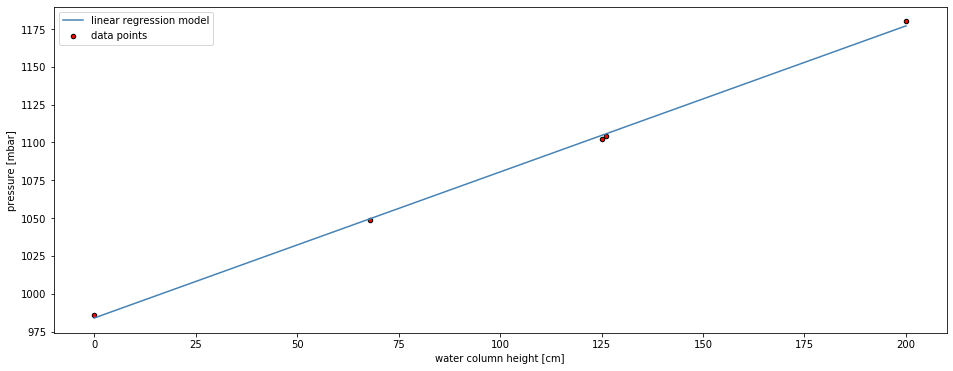

In [4]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)

linfit = smf.ols(formula=' pressure_mb ~ water_level_cm', data=df).fit()
intercept, slope = linfit.params

plt.scatter(x=df['water_level_cm'],y=df['pressure_mb'],s=20,alpha=1,marker='o', color = 'red', edgecolor = 'black',  label  = 'data points')
x = np.linspace(df['water_level_cm'].min(), df['water_level_cm'].max(), 100)
y = intercept + slope*x
ax.plot(x,y, 'steelblue', label = 'linear regression model')
ax.set_ylabel('pressure [mbar]')
ax.set_xlabel('water column height [cm]')
_= ax.legend()

In [5]:
linfit.summary()

/home/anna/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pressure_mb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2731.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.54e-05
Time:                        12:07:56   Log-Likelihood:                -10.887
No. Observations:                   5   AIC:                             25.77
Df Residuals:                       3   BIC:                             24.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        983.9759      2.280    431.596      0.000     976.720     991.231
water_level_cm     0.9656      0.018     52.257      0.000       0.907       1.024
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.287
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.554
Skew:                           0.193   Prob(JB):                        0.758
Kurtosis:                       1.415   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""